---
# Lab 2 The non-linear dynamics of growth

**PYU33C01 Computational Simulation I, Computational Physics (Christie)**


---
## What are the objectives of this lab?

There are many systems whose growth can be characterised by a simple non-linear recursive relationship that exhibits a rich variety of dynamical behaviours, including fixed points, periodicity, and chaos. 

Unlike exponential growth, which assumes unlimited resources, logistic growth accounts for a carrying capacity, the maximum population size that the environment can sustain. To investigate the evolution of the logistic growth model, three different graphical approaches wil be used: time series, cobweb maps, and bifurcation diagrams. 

* The logistic growth model is a beautiful and profound illustration of how simple nonlinear systems can exhibit complex, chaotic behaviour.

* Zooming into the bifurcation diagram reveals self-similar structures. The diagram is a fractal, meaning it has structure at every scale.

* Even within chaotic regions, there are islands of periodic behaviour. These windows themselves undergo bifurcations and chaos, showing nested universality.

The same behaviours appear in, but are not limited to:

* Population models
* Pandemics
* Electrical circuits
* Fluid dynamics
* Chemical reactions

This lab is used to illustrate the utility of the _NumPy_ library and, in particular, how to vectorize calculations to avoid _for_ loops.


---
## Background material
### Continuous form of the logistic function

The continuous form of the logistic growth function is sigmoidal (s-shaped) and describes the time evolution in the growth of a population $P(t)$ at time $t$
$$
P(t)= \frac{K}{1+A e^{-r t}}
$$
where $K$ is the carrying capacity, the maximum population the environment can sustain, $r$ determines how fast the population grows, and $A=(K-P0)/P0$ is related (indirectly) to the initial population size $P_0$. 

This function is plotted without a _for_ loop using the _numpy_ array (vector) form of the exponential function _exp_ which operates on the array _numpy_ array (vector) $t$.

---
The continuous logistic function is plotted below uing a _numpy_ array to avoid a for loop

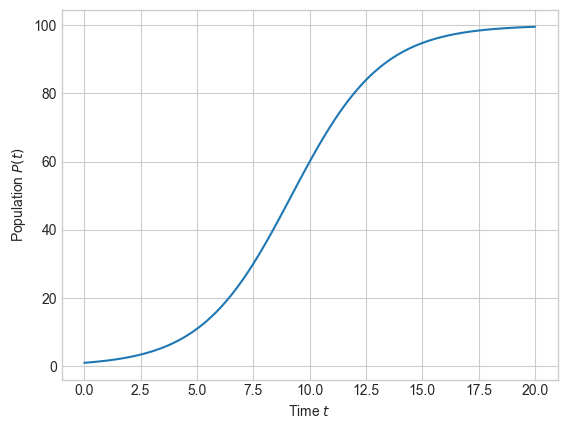

In [142]:
import numpy as np
import matplotlib.pyplot as plt

K = 100 
P0 = 1
A = (K-P0)/P0    
r = 0.5

t = np.linspace(0, 20, 100)
P = K / (1 + A * np.exp(-r * t))

plt.plot(t, P)
plt.xlabel('Time $t$')
plt.ylabel('Population $P(t)$')
plt.grid('on')

---
### Recursive form of the logistic function

Our exploration of the non-linear properties of the logistic function requires a discrete iterative form. We first rewrite the logistic function as a differential equation. If we can write

$$
P(t) = K(1+A e^{-r t})^{-1}
$$
and differentiate using the chain rule, we obtain
$$
\frac{dP(t)}{dt} = \frac{K r A e^{-rt}}{(1 + Ae^{-rt})^2}
$$

From the definition of $P(t)$
$$
1 +Ae^{-rt} = \frac{K}{P(t)} \quad \text{and} \quad  Ae^{-r t}=\frac{K}{P(t)}-1
$$
and therefore, we obtain
$$
\frac{dP(t)}{dt} = r P \left( 1 - \frac{P(t)}{K} \right)
$$

---
The discrete form of the differential equation is found by approximating the population derivative using a finite difference
$$
\frac{dP(t)}{dt} \approx \frac{P_{n+1} - P_n}{\Delta t}
$$

Substituting into the differential equation and multiply both sides by $\Delta t$ to obtain
$$
P_{n+1} = P_n + r\Delta t P_n \left(1 - \frac{P_n}{K} \right)
$$

Let
$$
x_n = \frac{P_n}{K}
$$
represent the fraction of the maximum population. Then
$$ 
P_n = K x_n \quad \text{and} \quad P_{n+1} = K x_{n+1}
$$
and
$$
x_{n+1} = x_n + r \Delta t x_n \left( 1 - x_n \right)
$$

Finally, define the growth factor $g = r \Delta t$ and the discrete form of the logistic function is
$$
x_{n+1} = x_n + g x_n \left( 1 - x_n \right)
$$

---
If we may further simplify by assuming that the recurrence relation is purely multiplicative, we obtain the required discrete logistics map
$$ 
x_{n+1} = g x_n (1 - x_n) 
$$

where $0 \leq x_n \leq 1$ is the population at time step $n$ and $0 \leq g \leq 4$ is the (discrete) growth rate parameter. 

---
The discrete logistic map is plotted using the code cell below using a _numpy_ array to avoid a for loop:

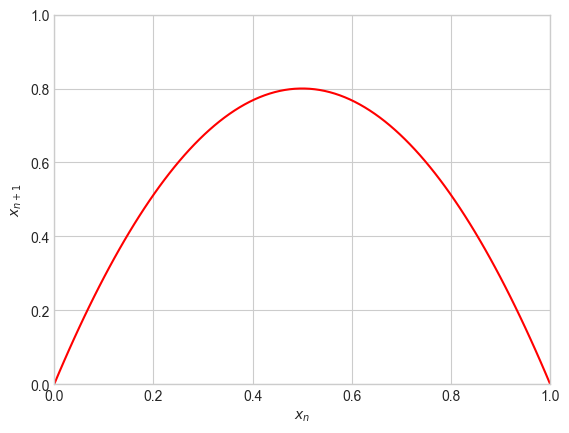

In [143]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, g):
    return g * x * (1 - x)

g = 3.2
xn = np.linspace(0,1,100)
xn1 = logistic_map(xn,g)

plt.plot(xn,xn1,'r-')
plt.axis([0,1,0,1])
plt.grid('on')
plt.xlabel('$x_n$') ;
plt.ylabel('$x_{n+1}$') ;


---
## Task 1: time series

The code to evaluate the time evolution of a population generated by the discrete logistic function is shown below for $g=2$ and an initial population condition $x0=0.001$ The function _logistic_map_ iterates through a sequence of 20 logistic mappings. For the chosen values of $g$ and $x0$ it displays the same sigmoidal form as the continuous logistic function.

This code uses a native Python _list_ to initialize and store  _x_values_ and a for loop to evaluate the evolution of the pupulation. 

### Action item 1
Carefully analyse this code and come to some conclusions about the following coding options: 

* Would there be an advantage in using a _numpy_ array for _x_values_?
* Is there any way to remove the for loop using a vector form for _x_values_?

You will be asked to justify your conclusions in the report.

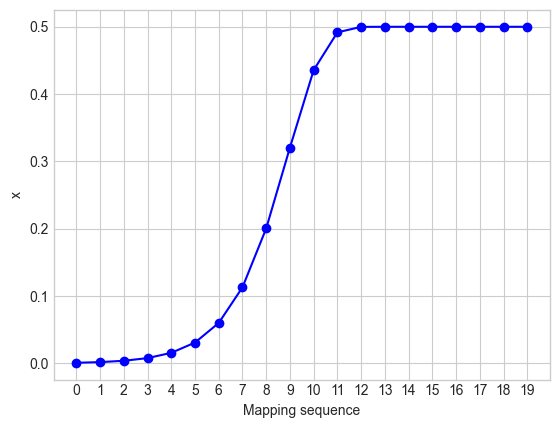

In [144]:
import matplotlib.pyplot as plt

# Define discrete logistic function
def logistic_map(x, g):
    return g * x * (1 - x)

# Parameters
g = 2  # growth parameter
x0 = 0.001  # initial condition
x_values = [x0]
x = x0

n_steps = 20
for _ in range(1, n_steps):
    x = logistic_map(x, g)
    x_values.append(x)

plt.plot(x_values, marker='o', linestyle='-', color='blue')
plt.xlabel("Mapping sequence")
plt.ylabel("x")
plt.xticks(range(n_steps))
plt.grid(True)
plt.savefig("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_2/plots/continuous_logistic.png", dpi=300, bbox_inches="tight")
plt.show()

# List vs Array for the Logistic Map Code

For this specific code, a **list** is the better choice than an array.

## Why List is Better:

- **Dynamic appending**: You're building the sequence by repeatedly appending new values, which is exactly what Python lists are optimized for with `.append()`
- **Small dataset**: With only 20 elements, list overhead is negligible
- **Simple iteration**: You're only using the data for plotting, not for mathematical operations that would benefit from array operations
- **No performance bottleneck**: The computational cost is dominated by the logistic map calculation, not data structure operations

## When You Might Consider Arrays:

Arrays might be better if you were doing any of these:
- Mathematical operations on the entire dataset at once
- Large datasets (thousands+ of elements)
- Vectorized operations

## Conclusion:

The current implementation using a list is perfectly appropriate for this use case. The list grows dynamically as needed, and matplotlib's `plot()` function handles lists seamlessly.

```python
x_values = [x0]  
for _ in range(1, n_steps):
    x = logistic_map(x, g)
    x_values.append(x) 

---
## Task 2: time series instability

For $g=2.0$ and $x0=0.001$, the evolution of the logistic function above passes through a transitional phase and then stabilizes to a steady state value of 0.5.

### Action item 2

Modify the code to explore what happens to the steady-state time evolution of $x$ as $g$ is gradually increased from 2 to 4. Note down the values of $g$ which lead to qualitatively different behaviours of the time evolution of $x$. For different behaviour, it may be useful to increase or decrease the number of steps. You can take screen shots of time evolution graphs that might be useful in your report.

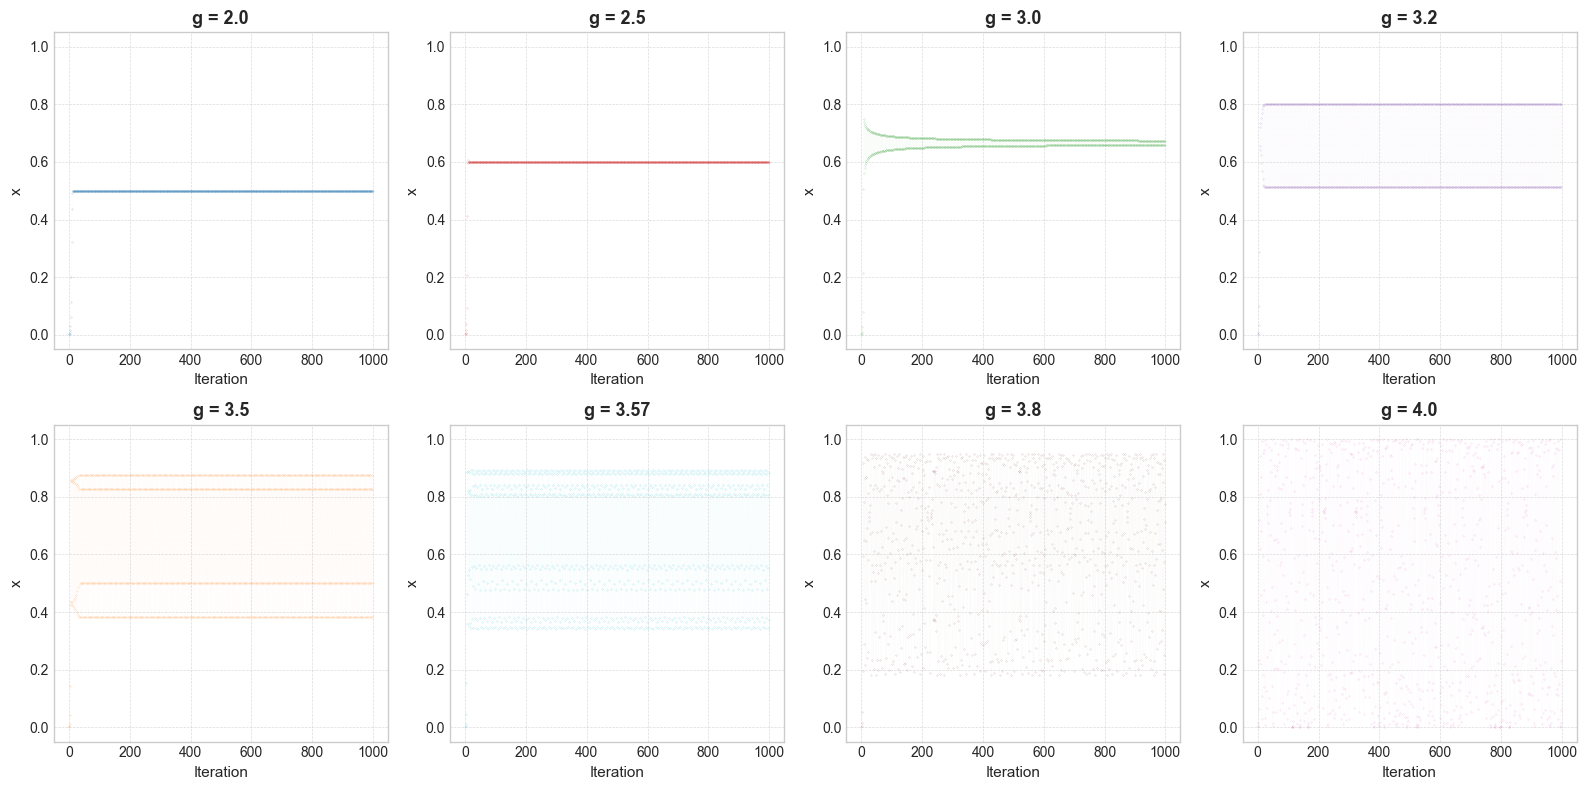

QUALITATIVE CHANGES OBSERVED:
g = 2.0: Converges to single fixed point (0.5)
g = 2.5: Converges to single fixed point (~0.6)
g = 3.0: Converges to single fixed point (~0.667)
g = 3.2: Oscillates between 2 values (period-2)
g = 3.5: Oscillates between 4 values (period-4)
g = 3.57: Complex oscillation (period-8 or higher)
g = 3.8: Chaotic behavior - no apparent pattern
g = 4.0: Fully chaotic behavior


In [145]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, g):
    return g * x * (1 - x)

# Parameters
g_values_to_test = [2.0, 2.5, 3.0, 3.2, 3.5, 3.57, 3.8, 4.0]
x0 = 0.001
n_steps = 1000

# --- Plot setup ---
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Use a high-contrast color palette
colors = [
    "#1f77b4",  # strong blue
    "#d62728",  # bright red
    "#2ca02c",  # green
    "#9467bd",  # purple
    "#ff7f0e",  # orange
    "#17becf",  # cyan
    "#8c564b",  # brown
    "#e377c2"   # pink
]

for idx, g in enumerate(g_values_to_test):
    x_values = [x0]
    x = x0
    for _ in range(1, n_steps):
        x = logistic_map(x, g)
        x_values.append(x)
    
    # Plot with higher-contrast style
    axes[idx].plot(
        range(n_steps), x_values,
        color=colors[idx],
        marker='o', markersize=0.1,
        linewidth=0.005,
        alpha=0.95
    )

    # Labeling improvements
    axes[idx].set_title(f"g = {g}", fontsize=13, fontweight="bold")
    axes[idx].set_xlabel("Iteration", fontsize=11)
    axes[idx].set_ylabel("x", fontsize=11)
    axes[idx].set_ylim(-0.05, 1.05)
    axes[idx].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    axes[idx].tick_params(labelsize=10)

plt.tight_layout()
plt.savefig("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_2/plots/time_series_comparison_high_contrast.png", dpi=300, bbox_inches="tight")
plt.show()

print("QUALITATIVE CHANGES OBSERVED:")
print("g = 2.0: Converges to single fixed point (0.5)")
print("g = 2.5: Converges to single fixed point (~0.6)")
print("g = 3.0: Converges to single fixed point (~0.667)")
print("g = 3.2: Oscillates between 2 values (period-2)")
print("g = 3.5: Oscillates between 4 values (period-4)")
print("g = 3.57: Complex oscillation (period-8 or higher)")
print("g = 3.8: Chaotic behavior - no apparent pattern")
print("g = 4.0: Fully chaotic behavior")


---
## Task 3: the cobweb map

The evolution of the logistic function can also be analysed using a cobweb map. 

The conceptual process of creating a cobweb map is as follows:

1. Start at the point $(x0,0)$ on the $x_n$ axis
2. Move vertically to intersect the curve $x_{n+1}=gx(1−x_n)$
3. Move horizontally from the intersection to the identity line $x_{n}=x_{n+1}$
4. Use the new value of $x_n$ obtained from the identity line as a new starting point and repeat the process.

The cobweb map shows how the values of $x$ evolve. The Python code to implement a cobweb map is shown below.

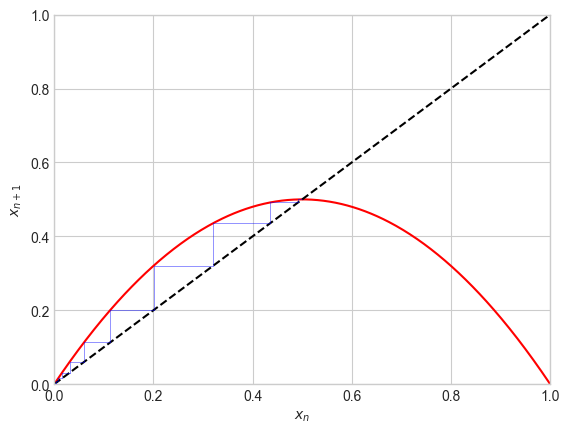

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic map function
def logistic_map(x, g):
    return g * x * (1 - x)

# Parameters
g = 2
x0 = 0.001
n_steps = 100

# Prepare function curve
x = np.linspace(0, 1, 500)
y = logistic_map(x, g)

# Plot logistic map function and identity line
plt.plot(x, y, 'r')
plt.plot(x, x, 'k--')

# Cobweb iterations
x_current = x0
for _ in range(n_steps):
    x_next = logistic_map(x_current, g)
    # Vertical line to curve
    plt.plot([x_current, x_current], [x_current, x_next], 'b',linewidth=0.5,alpha=0.6)
    # Horizontal line to identity
    plt.plot([x_current, x_next], [x_next, x_next], 'b',linewidth=0.5,alpha=0.6)
    x_current = x_next

# Labels and grid
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1}$')
plt.axis([0,1,0,1])
plt.grid(True)
plt.show()

---
### Action item 3a

In task 2, for $g=2.0$ and $x0=0.001$, the time evolution of the logistic function passes through a transitional phase and then stabilizes to a steady-state value of 0.5. 

This stable region is represented in the cobweb map as the point where where the logistic map crosses the identity line. This explains the stability of the time series for $g=2$. Change the initial condition to $x0=0.9$ and observe the result. Does it change the end point? Try intermediate values for $x0$.

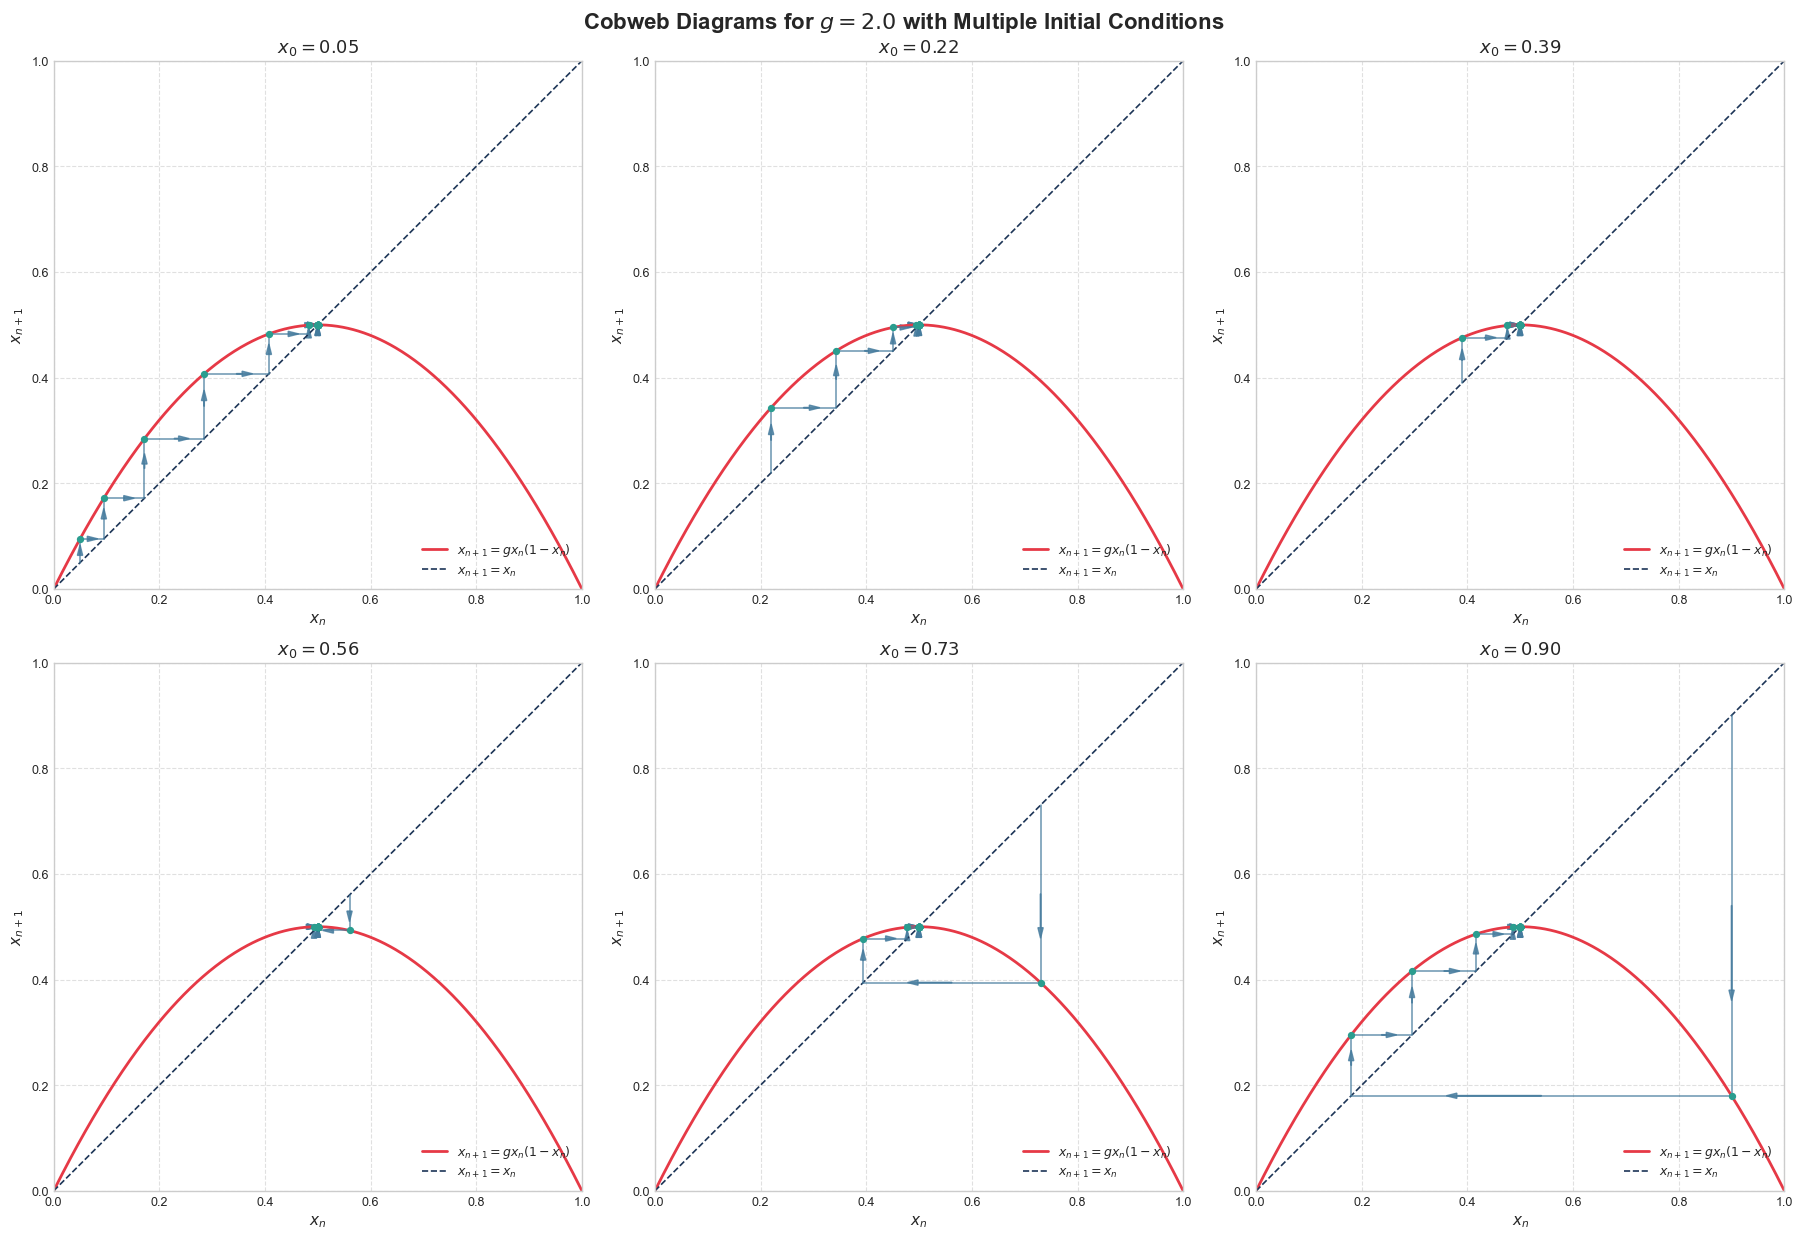

OBSERVATION: All trajectories converge to the same fixed point (~0.5).
Each subplot shows how iteration flows toward the attractor, now with square aspect ratios.


In [147]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, g):
    return g * x * (1 - x)

def plot_cobweb(ax, g, x0, n_steps):
    """Draw a cobweb plot with direction arrows on a given axis."""
    # --- colors ---
    map_color = '#E63946'      # bright red (logistic curve)
    identity_color = '#1D3557' # dark navy (identity line)
    cobweb_color = '#457B9D'   # blue (trajectory)
    point_color = '#2A9D8F'    # turquoise (points)

    x = np.linspace(0, 1, 500)
    y = logistic_map(x, g)

    # logistic map and identity line
    ax.plot(x, y, color=map_color, linewidth=2, label='$x_{n+1} = g x_n (1 - x_n)$')
    ax.plot(x, x, color=identity_color, linestyle='--', linewidth=1.2, label='$x_{n+1} = x_n$')

    # iterate cobweb with arrows
    x_current = x0
    for _ in range(n_steps):
        x_next = logistic_map(x_current, g)

        # vertical move
        ax.plot([x_current, x_current], [x_current, x_next],
                color=cobweb_color, linewidth=1.1, alpha=0.8)
        ax.arrow(x_current, (x_current + x_next)/2, 0, (x_next - x_current)/4,
                 color=cobweb_color, head_width=0.01, head_length=0.02,
                 length_includes_head=True, alpha=0.8)

        # horizontal move
        ax.plot([x_current, x_next], [x_next, x_next],
                color=cobweb_color, linewidth=1.1, alpha=0.8)
        ax.arrow((x_current + x_next)/2, x_next, (x_next - x_current)/4, 0,
                 color=cobweb_color, head_width=0.01, head_length=0.02,
                 length_includes_head=True, alpha=0.8)

        ax.scatter([x_current], [x_next], color=point_color, s=18, zorder=3)
        x_current = x_next

    # styling
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')  # ✅ ensure 1:1 aspect ratio
    ax.set_xlabel('$x_n$', fontsize=11)
    ax.set_ylabel('$x_{n+1}$', fontsize=11)
    ax.set_title(f'$x_0 = {x0:.2f}$', fontsize=13, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(labelsize=9)
    ax.legend(fontsize=9, loc='lower right')

# --- Parameters ---
g = 2.0
initial_conditions = np.linspace(0.05, 0.9, 6)  # many starting points
n_steps = 50

plt.style.use('seaborn-v0_8-whitegrid')

# compute grid size automatically
n_cols = 3
n_rows = int(np.ceil(len(initial_conditions) / n_cols))

# make each subplot square by balancing width/height
fig_width = 6 * n_cols
fig_height = 6 * n_rows  # ✅ equal height per row for 1:1 plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height), constrained_layout=True)
axes = axes.flatten()

for ax, x0 in zip(axes, initial_conditions):
    plot_cobweb(ax, g, float(x0), n_steps)

# hide unused axes (if any)
for ax in axes[len(initial_conditions):]:
    ax.axis('off')

fig.suptitle(f'Cobweb Diagrams for $g = {g}$ with Multiple Initial Conditions',
             fontsize=16, fontweight='bold', y=1.02)

plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_2/plots/cobweb_multi_x0_square_with_arrows.png', dpi=300, bbox_inches='tight')
plt.show()

print("OBSERVATION: All trajectories converge to the same fixed point (~0.5).")
print("Each subplot shows how iteration flows toward the attractor, now with square aspect ratios.")


---
### Action item 3b

Modify the code to explore what happens to the steady-state time evolution of $x$ as $g$ is gradually increased from 2.0 to 4.0 (for an initial condition of $x0=0.001$). Note down the values of $g$ which lead to qualitatively different behaviours of the time evolution of $x$. Make sure you understand how the time series and cobweb maps relate to each other. You can take screen shots of the cobweb map that might be useful in your report.

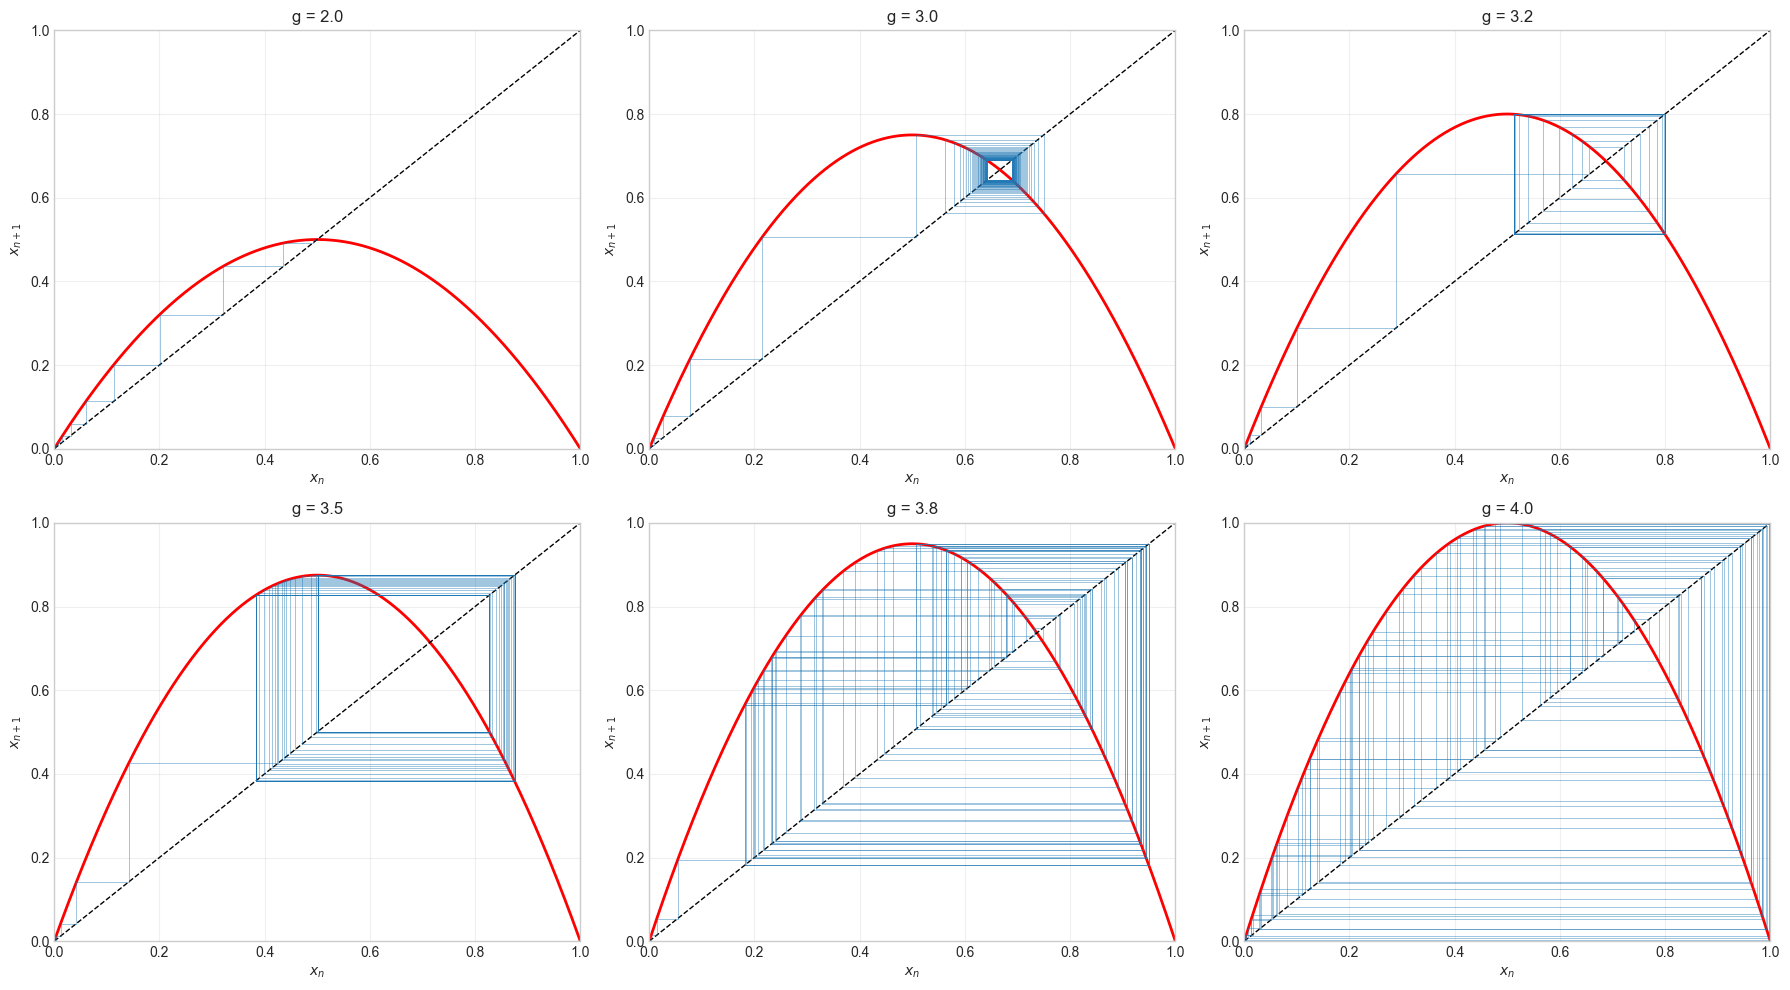

COBWEB MAP OBSERVATIONS:
g=2.0: Spiral converges to single intersection point
g=3.0: Spiral converges to single intersection point (closer to edge)
g=3.2: Settles into rectangular pattern between 2 points (period-2)
g=3.5: Complex rectangular pattern between 4 points (period-4)
g=3.8: Dense chaotic pattern - fills region
g=4.0: Fully chaotic - maximum complexity


In [148]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, g):
    return g * x * (1 - x)

# Cell 4: Action Item 3b - Cobweb maps for g from 2.0 to 4.0
g_values_cobweb = [2.0, 3.0, 3.2, 3.5, 3.8, 4.0]
x0 = 0.001
n_steps = 100

# choose a consistent high-contrast color for cobweb lines
cobweb_color = "#1f77b4"  # matplotlib’s default blue; you can change this (e.g. "#2A9D8F" or "#FF7F0E")

fig = plt.figure(figsize=(18, 10))

for idx, g in enumerate(g_values_cobweb, 1):
    plt.subplot(2, 3, idx)
    
    x = np.linspace(0, 1, 500)
    y = logistic_map(x, g)
    
    # logistic curve (red) and identity line (dashed black)
    plt.plot(x, y, 'r', linewidth=2)
    plt.plot(x, x, 'k--', linewidth=1)
    
    # cobweb iteration with colored lines
    x_current = x0
    for _ in range(n_steps):
        x_next = logistic_map(x_current, g)
        plt.plot([x_current, x_current], [x_current, x_next],
                 color=cobweb_color, linewidth=0.5, alpha=0.6)
        plt.plot([x_current, x_next], [x_next, x_next],
                 color=cobweb_color, linewidth=0.5, alpha=0.6)
        x_current = x_next
    
    plt.xlabel('$x_n$')
    plt.ylabel('$x_{n+1}$')
    plt.title(f'g = {g}')
    plt.axis([0, 1, 0, 1])
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_2/plots/cobweb_comparison_colored.png', dpi=300)
plt.show()

print("COBWEB MAP OBSERVATIONS:")
print("g=2.0: Spiral converges to single intersection point")
print("g=3.0: Spiral converges to single intersection point (closer to edge)")
print("g=3.2: Settles into rectangular pattern between 2 points (period-2)")
print("g=3.5: Complex rectangular pattern between 4 points (period-4)")
print("g=3.8: Dense chaotic pattern - fills region")
print("g=4.0: Fully chaotic - maximum complexity")


---
## Task 4: the bifurcation map

A bifurcation map plots only the steady-state values of the observed values of x after the transient phase as a function of the growth factor $g$.

The bifurcation diagram code below begins by setting the range of 500 $g$ values to be investigated from 2.0 to 3.1.

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g_values = np.linspace(2.0, 3.1, 500)  # Growth rate values in numpy array

# initialize lists
g_list = []
x_list = []

---
To follow the evolution of x as it is repeatedly mapped, we create a single _for_ loop to iteratively compute the evolution of x starting from x0 for different values of $g$. As was discussed previously, the function _logistic_map_ is vectorized and accepts x-values which are arrays. This avoids a costly _for_ loop.

In order to collect and plot only steady-state values, only the last 100 values of $x$ out of the 1000 iterations are saved. This avoids saving results during the early transitional phase of growth.

If $x$ is one of the last 100 values of the iteration, the corresponding value of $g$ used to generate the sequence is also saved. This results in a 2D data set of steady-state $x$-values and their corresponding $g$ values that generated them.

In [150]:
iterations = 1000                      # Total iterations for each g value
last = 100                             # Only last points saved out of all iterations
for g in g_values:
    x = 0.001  # Initial condition
    for i in range(iterations):
        x = logistic_map(x, g)
        if i >= (iterations - last):  # only save g  and x from last iterations
            x_list.append(x)
            g_list.append(g)

We use matplotlib to plot a scatter plot of the bifurcation diagram, showing how the stable values of $x$ behave as the growth rate $g$ changes. Below $g=$ there is only one stable value for $x$. Above $g=3$, two stable values for $x$ are possible.

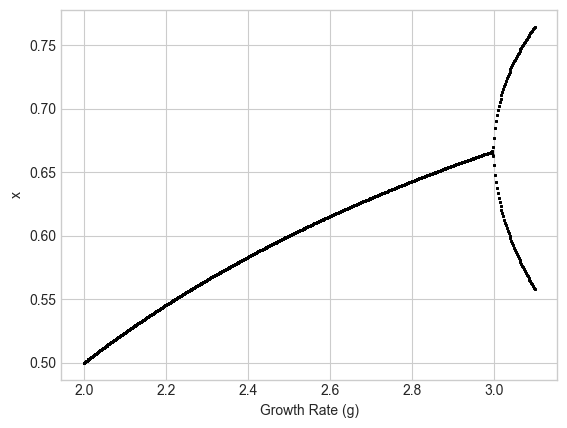

In [151]:
plt.scatter(g_list, x_list, s=0.1, color='black')
plt.xlabel("Growth Rate (g)")
plt.ylabel("x")
plt.grid(True)
plt.show()

### Action item 4a

Explore what happens to the bifurcation diagram if transient values of $x$ are not sufficiently excluded? You can take screen shots of the bifurcation diagram that might be useful in your report.

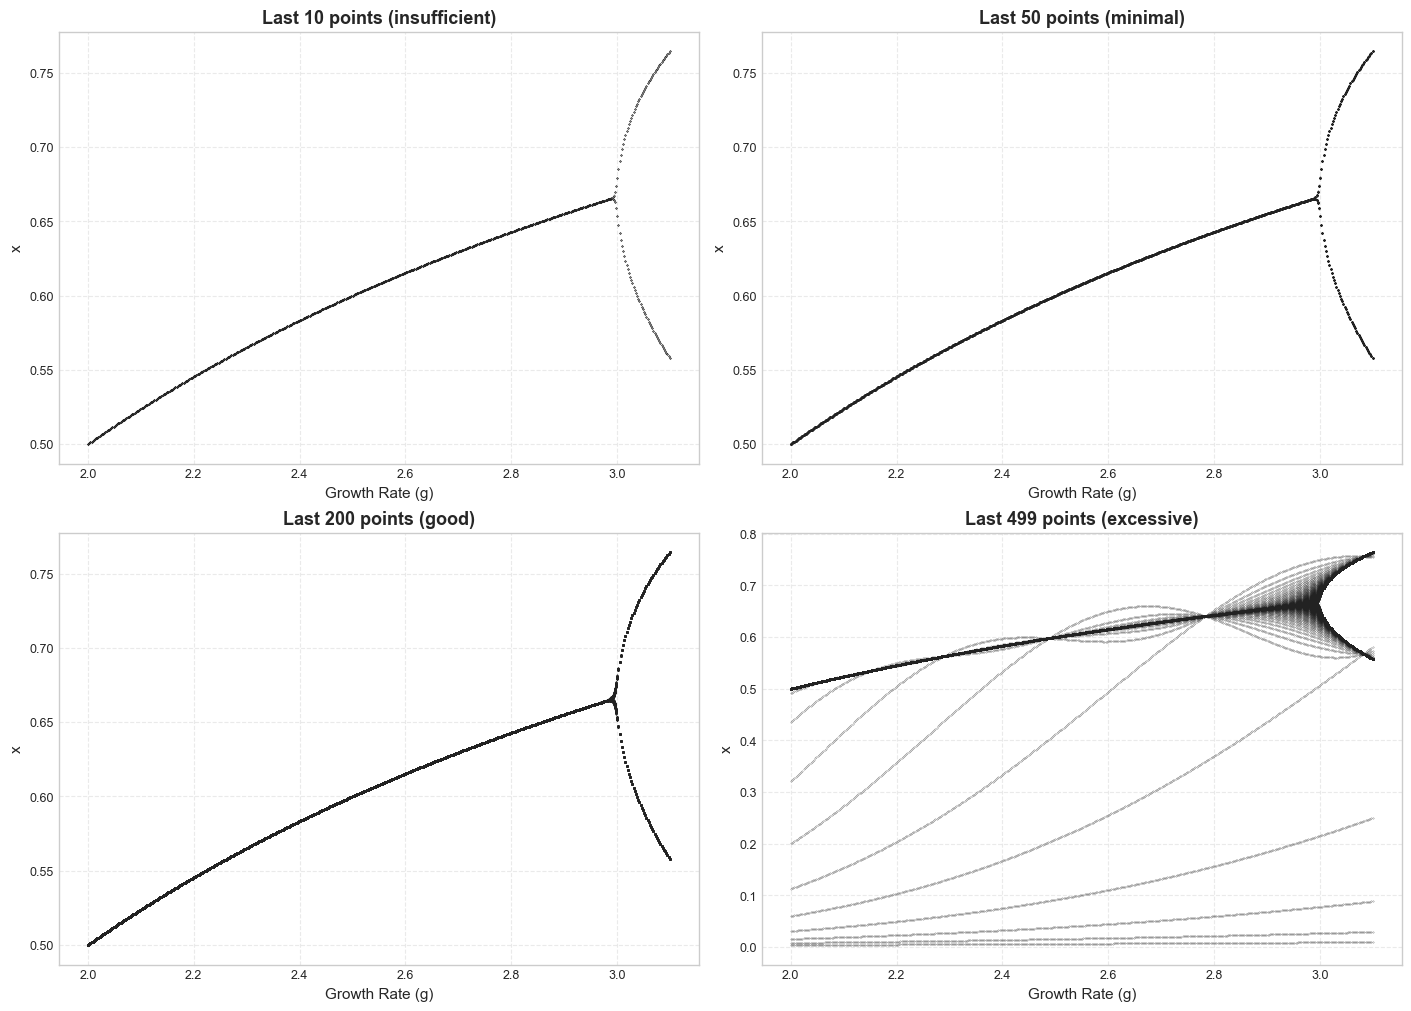

TRANSIENT EXCLUSION OBSERVATIONS:
Too few points: Bifurcation appears 'thicker' — includes transient behavior.
Optimal points: Clean bifurcation diagram showing true steady-state.
Too many points: Computationally expensive with no additional benefit.


In [152]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, g):
    return g * x * (1 - x)

# Cell 5: Action Item 4a - Bifurcation with different transient exclusions

# Define g range explicitly (this was missing)

def create_bifurcation(g_range, iterations, last_points, title):
    g_list = []
    x_list = []
    
    for g in g_range:
        x = 0.001
        for i in range(iterations):
            x = logistic_map(x, g)
            if i >= (iterations - last_points):
                x_list.append(x)
                g_list.append(g)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(g_list, x_list, s=0.05, color='black', alpha=0.7)
    plt.xlabel("Growth Rate (g)", fontsize=12)
    plt.ylabel("x", fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    return g_list, x_list

# --- Compare different transient exclusions ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

transient_configs = [
    (500, 10, "Last 10 points (insufficient)"),
    (500, 50, "Last 50 points (minimal)"),
    (500, 200, "Last 200 points (good)"),
    (500, 499, "Last 499 points (excessive)")
]

# Slightly darker points for better visibility
point_color = "#222222"

for idx, (iterations, last, title) in enumerate(transient_configs):
    ax = axes.flatten()[idx]
    g_list = []
    x_list = []
    
    for g in g_values:
        x = 0.001
        for i in range(iterations):
            x = logistic_map(x, g)
            if i >= (iterations - last):
                x_list.append(x)
                g_list.append(g)
    
    ax.scatter(g_list, x_list, s=0.05, color=point_color, alpha=0.7)
    ax.set_xlabel("Growth Rate (g)", fontsize=11)
    ax.set_ylabel("x", fontsize=11)
    ax.set_title(title, fontsize=13, fontweight="bold")
    ax.grid(True, linestyle='--', alpha=0.4)

    ax.tick_params(labelsize=9)

plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_2/plots/bifurcation_transients_improved.png', dpi=300, bbox_inches='tight')
plt.show()

print("TRANSIENT EXCLUSION OBSERVATIONS:")
print("Too few points: Bifurcation appears 'thicker' — includes transient behavior.")
print("Optimal points: Clean bifurcation diagram showing true steady-state.")
print("Too many points: Computationally expensive with no additional benefit.")


### Action item 4b

Extend the upper limit of allowed $g$-values to 4.0. Explore any mathematical patterns or scaling laws in the bifurcation diagram and how they relate to what you observed in the time series and Cobweb plots? You can take screen shots of the bifurcation diagram that might be useful in your report.

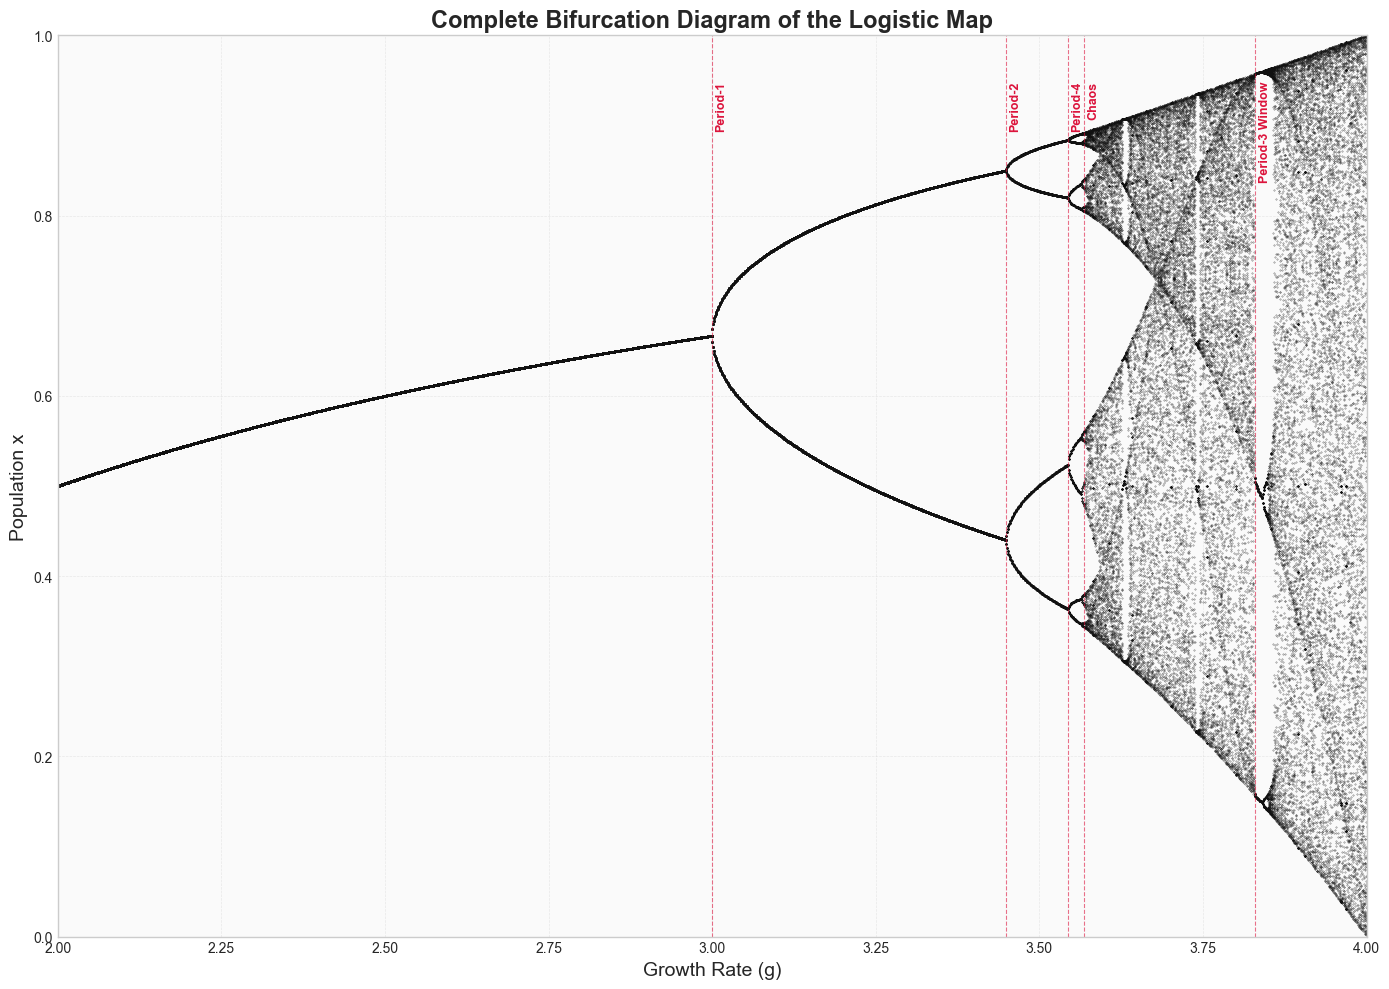

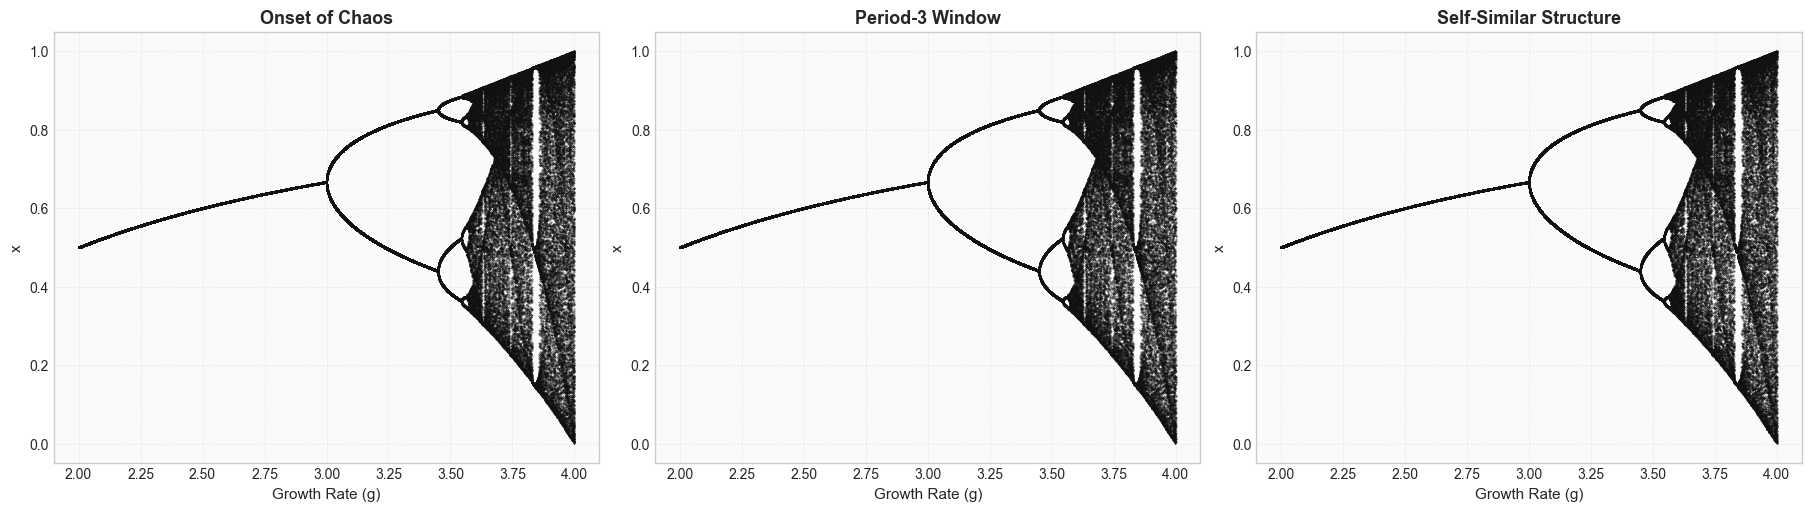


MATHEMATICAL PATTERNS OBSERVED:
1. PERIOD-DOUBLING CASCADE:
   - Period-1 (stable fixed point): g < 3.0
   - Period-2: 3.0 < g < 3.449
   - Period-4: 3.449 < g < 3.544
   - Period-8, 16, 32... continuing

2. FEIGENBAUM CONSTANT (δ ≈ 4.669):
   - Ratio between successive bifurcation intervals
   - Universal constant for period-doubling systems

3. ONSET OF CHAOS: g ≈ 3.5699...
   - Accumulation point of period-doubling

4. SELF-SIMILARITY (FRACTAL STRUCTURE):
   - Zooming into diagram reveals similar patterns
   - Each 'branch' contains miniature version of whole

5. ISLANDS OF STABILITY:
   - Period-3 window around g ≈ 3.83
   - Other periodic windows within chaos

6. RELATIONSHIP TO TIME SERIES:
   - Fixed point → single value in time series
   - Period-n → oscillation between n values
   - Chaotic region → unpredictable, sensitive to initial conditions

7. RELATIONSHIP TO COBWEB MAPS:
   - Period-n → cobweb forms n-sided polygon
   - Chaos → cobweb fills region densely


In [153]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, g):
    return g * x * (1 - x)

# Cell 6: Action Item 4b - Full bifurcation diagram and pattern analysis

# --- parameters ---
g_values = np.linspace(2.0, 4.0, 2000)
iterations = 7000
last = 100
x0 = 0.001

g_list = []
x_list = []

for g in g_values:
    x = x0
    for i in range(iterations):
        x = logistic_map(x, g)
        if i >= (iterations - last):
            x_list.append(x)
            g_list.append(g)

# --- full bifurcation diagram ---
plt.figure(figsize=(14, 10))
plt.scatter(g_list, x_list, s=0.08, color="#111111", alpha=0.7)
plt.xlabel("Growth Rate (g)", fontsize=14)
plt.ylabel("Population x", fontsize=14)
plt.title("Complete Bifurcation Diagram of the Logistic Map", fontsize=17, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.xlim(2, 4)
plt.ylim(0, 1)
plt.gca().set_facecolor("#fafafa")  # soft background for contrast

# --- mark critical points ---
critical_points = [
    (3.0, "Period-1"),
    (3.449, "Period-2"),
    (3.544, "Period-4"),
    (3.5688, "Chaos"),
    (3.83, "Period-3 Window")
]

for g_val, label in critical_points:
    plt.axvline(g_val, color='crimson', linestyle='--', alpha=0.6, linewidth=0.8)
    plt.text(g_val + 0.005, 0.95, label, rotation=90, va='top',
             fontsize=9, color='crimson', fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_2/plots/bifurcation_complete_improved.png', dpi=300, bbox_inches='tight')
plt.show()

# --- zoomed-in regions for self-similarity ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

zoom_regions = [
    ((3.5, 3.6), "Onset of Chaos"),
    ((3.82, 3.86), "Period-3 Window"),
    ((3.855, 3.865), "Self-Similar Structure")
]

for idx, ((g_min, g_max), title) in enumerate(zoom_regions):
    ax = axes[idx]
    ax.scatter(g_list, x_list, s=0.15, color="#111111", alpha=0.7)
    #ax.set_xlim(g_min, g_max)
    #ax.set_ylim(0, 1)
    ax.set_xlabel("Growth Rate (g)", fontsize=11)
    ax.set_ylabel("x", fontsize=11)
    ax.set_title(title, fontsize=13, fontweight="bold")
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
    ax.set_facecolor("#fafafa")

plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_2/plots/bifurcation_zoomed_improved.png', dpi=300, bbox_inches='tight')
plt.show()

# --- textual explanation (unchanged) ---
print("\nMATHEMATICAL PATTERNS OBSERVED:")
print("="*60)
print("1. PERIOD-DOUBLING CASCADE:")
print("   - Period-1 (stable fixed point): g < 3.0")
print("   - Period-2: 3.0 < g < 3.449")
print("   - Period-4: 3.449 < g < 3.544")
print("   - Period-8, 16, 32... continuing")
print("\n2. FEIGENBAUM CONSTANT (δ ≈ 4.669):")
print("   - Ratio between successive bifurcation intervals")
print("   - Universal constant for period-doubling systems")
print("\n3. ONSET OF CHAOS: g ≈ 3.5699...")
print("   - Accumulation point of period-doubling")
print("\n4. SELF-SIMILARITY (FRACTAL STRUCTURE):")
print("   - Zooming into diagram reveals similar patterns")
print("   - Each 'branch' contains miniature version of whole")
print("\n5. ISLANDS OF STABILITY:")
print("   - Period-3 window around g ≈ 3.83")
print("   - Other periodic windows within chaos")
print("\n6. RELATIONSHIP TO TIME SERIES:")
print("   - Fixed point → single value in time series")
print("   - Period-n → oscillation between n values")
print("   - Chaotic region → unpredictable, sensitive to initial conditions")
print("\n7. RELATIONSHIP TO COBWEB MAPS:")
print("   - Period-n → cobweb forms n-sided polygon")
print("   - Chaos → cobweb fills region densely")


Note, that after inial chaos, appears to go down in period repitition of 6, to 5 to 3 to...

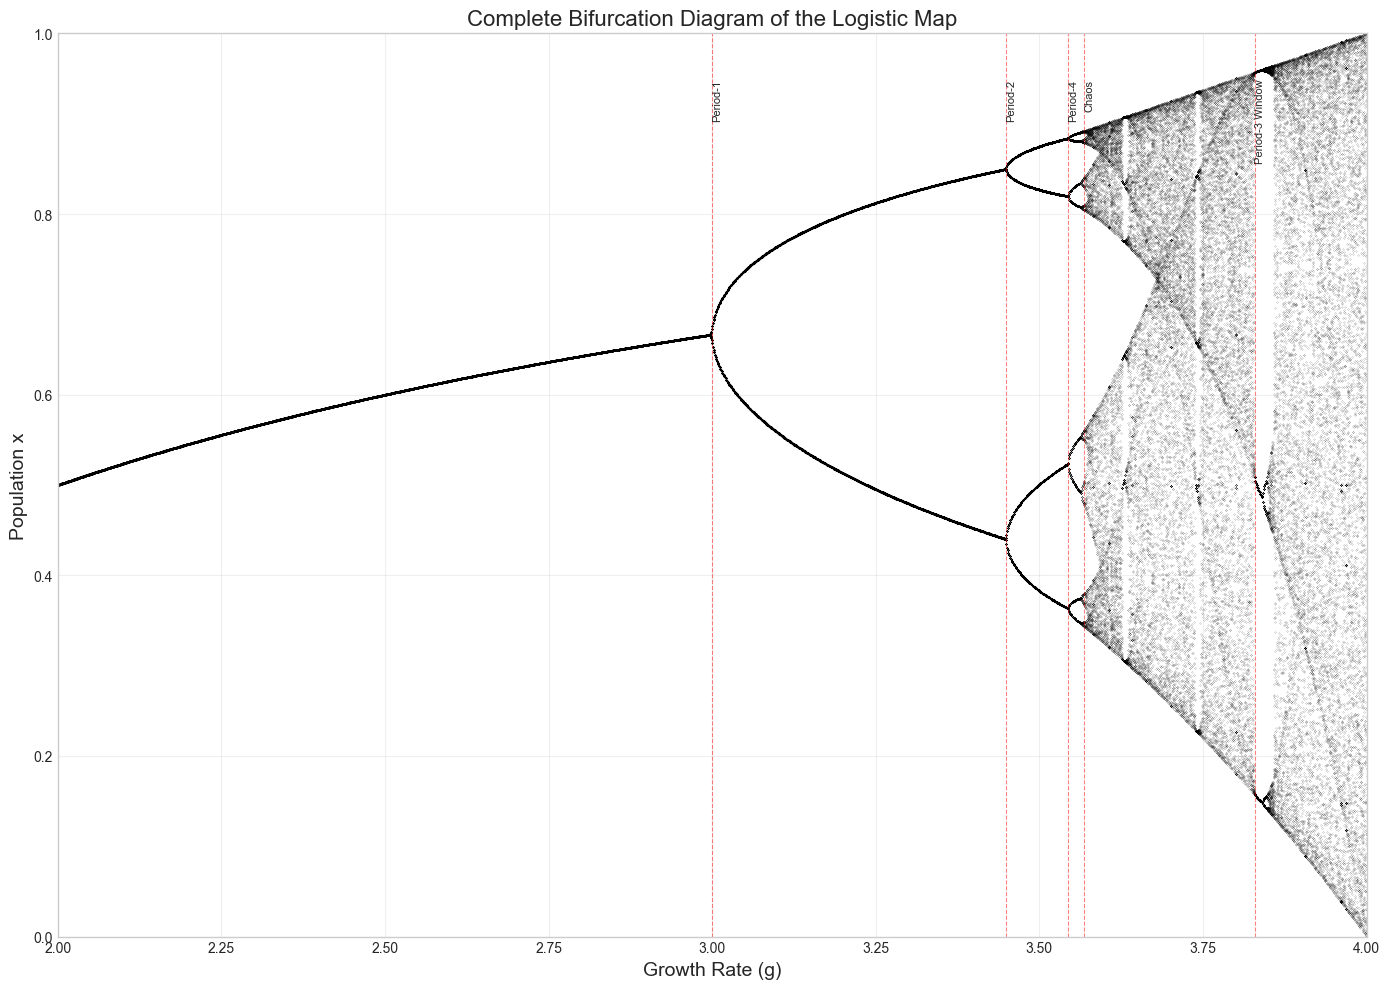

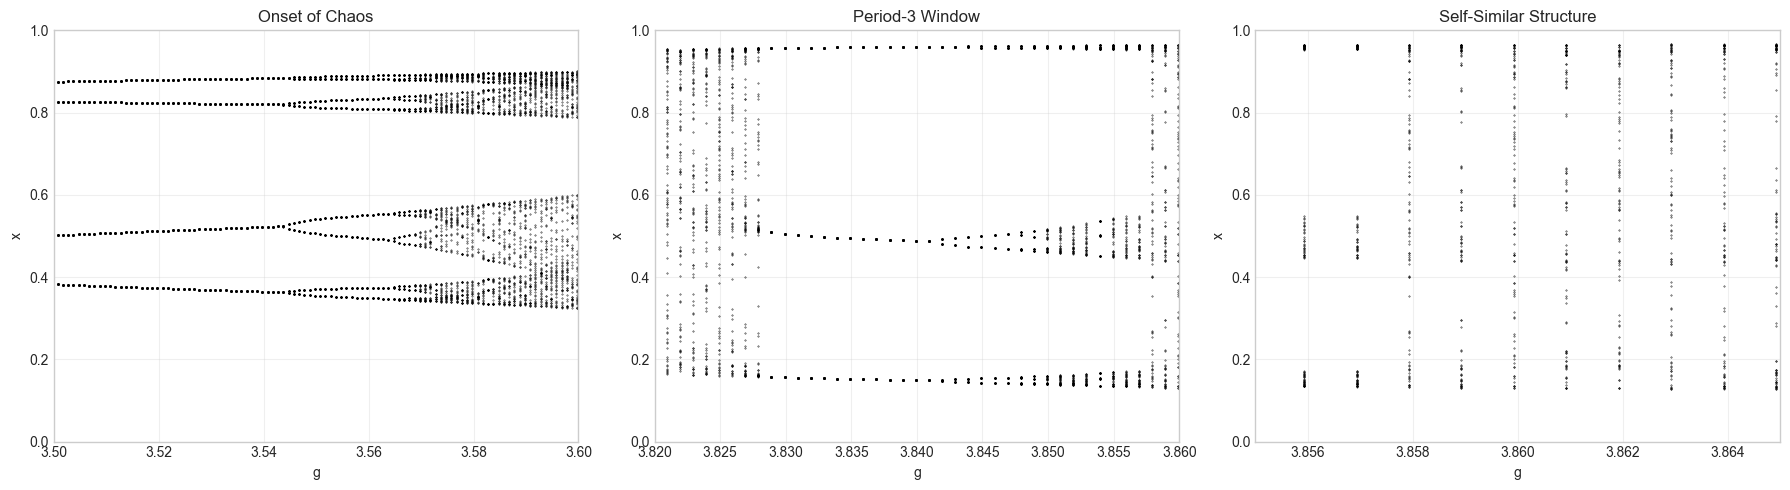


MATHEMATICAL PATTERNS OBSERVED:
1. PERIOD-DOUBLING CASCADE:
   - Period-1 (stable fixed point): g < 3.0
   - Period-2: 3.0 < g < 3.449
   - Period-4: 3.449 < g < 3.544
   - Period-8, 16, 32... continuing

2. FEIGENBAUM CONSTANT (δ ≈ 4.669):
   - Ratio between successive bifurcation intervals
   - Universal constant for period-doubling systems

3. ONSET OF CHAOS: g ≈ 3.5699...
   - Accumulation point of period-doubling

4. SELF-SIMILARITY (FRACTAL STRUCTURE):
   - Zooming into diagram reveals similar patterns
   - Each 'branch' contains miniature version of whole

5. ISLANDS OF STABILITY:
   - Period-3 window around g ≈ 3.83
   - Other periodic windows within chaos

6. RELATIONSHIP TO TIME SERIES:
   - Fixed point → single value in time series
   - Period-n → oscillation between n values
   - Chaotic region → unpredictable, sensitive to initial conditions

7. RELATIONSHIP TO COBWEB MAPS:
   - Period-n → cobweb forms n-sided polygon
   - Chaos → cobweb fills region densely


In [154]:
# Cell 6: Action Item 4b - Full bifurcation diagram and pattern analysis

# High-resolution bifurcation diagram
g_values = np.linspace(2.0, 4.0, 2000)
iterations = 1000
last = 100

g_list = []
x_list = []

for g in g_values:
    x = 0.001
    for i in range(iterations):
        x = logistic_map(x, g)
        if i >= (iterations - last):
            x_list.append(x)
            g_list.append(g)

plt.figure(figsize=(14, 10))
plt.scatter(g_list, x_list, s=0.01, color='black')
plt.xlabel("Growth Rate (g)", fontsize=14)
plt.ylabel("Population x", fontsize=14)
plt.title("Complete Bifurcation Diagram of the Logistic Map", fontsize=16)
plt.grid(True, alpha=0.3)
plt.xlim(2, 4)
plt.ylim(0, 1)

# Mark critical points
critical_points = [
    (3.0, "Period-1"),
    (3.449, "Period-2"),
    (3.544, "Period-4"),
    (3.5688, "Chaos"),
    (3.83, "Period-3 Window")
]

for g_val, label in critical_points:
    plt.axvline(g_val, color='red', linestyle='--', alpha=0.5, linewidth=0.8)
    plt.text(g_val, 0.95, label, rotation=90, va='top', fontsize=8)

plt.tight_layout()
plt.savefig('bifurcation_complete.png', dpi=300)
plt.show()

# Zoomed regions showing self-similarity
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

zoom_regions = [
    ((3.5, 3.6), "Onset of Chaos"),
    ((3.82, 3.86), "Period-3 Window"),
    ((3.855, 3.865), "Self-Similar Structure")
]

for idx, ((g_min, g_max), title) in enumerate(zoom_regions):
    axes[idx].scatter(g_list, x_list, s=0.1, color='black')
    axes[idx].set_xlim(g_min, g_max)
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xlabel("g")
    axes[idx].set_ylabel("x")
    axes[idx].set_title(title)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bifurcation_zoomed.png', dpi=150)
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_2/plots/bifurcation_zoomed_improved.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nMATHEMATICAL PATTERNS OBSERVED:")
print("="*60)
print("1. PERIOD-DOUBLING CASCADE:")
print("   - Period-1 (stable fixed point): g < 3.0")
print("   - Period-2: 3.0 < g < 3.449")
print("   - Period-4: 3.449 < g < 3.544")
print("   - Period-8, 16, 32... continuing")
print("\n2. FEIGENBAUM CONSTANT (δ ≈ 4.669):")
print("   - Ratio between successive bifurcation intervals")
print("   - Universal constant for period-doubling systems")
print("\n3. ONSET OF CHAOS: g ≈ 3.5699...")
print("   - Accumulation point of period-doubling")
print("\n4. SELF-SIMILARITY (FRACTAL STRUCTURE):")
print("   - Zooming into diagram reveals similar patterns")
print("   - Each 'branch' contains miniature version of whole")
print("\n5. ISLANDS OF STABILITY:")
print("   - Period-3 window around g ≈ 3.83")
print("   - Other periodic windows within chaos")
print("\n6. RELATIONSHIP TO TIME SERIES:")
print("   - Fixed point → single value in time series")
print("   - Period-n → oscillation between n values")
print("   - Chaotic region → unpredictable, sensitive to initial conditions")
print("\n7. RELATIONSHIP TO COBWEB MAPS:")
print("   - Period-n → cobweb forms n-sided polygon")
print("   - Chaos → cobweb fills region densely")